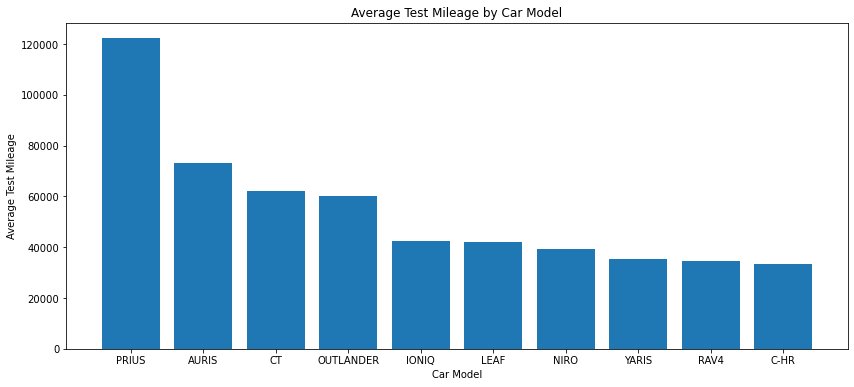

In [1]:

######### 2_4 Average Test Mileage #########

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_url = 'C:/Users/samar/Downloads/dft_test_result_2022/test_result.csv'
df = pd.read_csv(csv_url, delimiter = '|', error_bad_lines=False)
df = df[df['fuel_type'].isin(['EL', 'Electric', 'HY' , 'Hybrid Electric (Clean)'])]
# calculating age
df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']
# Define a function to check if the value is less than 8 and return 1, otherwise 0
def assign_value_less_80(x):
    return 1 if x > 8 else 0
df['boh_below_80'] = df['age'].apply(assign_value_less_80)
def assign_value_80_90(x):
    return 1 if 5 <= x <= 8 else 0
df['boh_80-90'] = df['age'].apply(assign_value_80_90)
def assign_value_above_90(x):
    return 1 if x < 5 else 0
df['boh_above_90'] = df['age'].apply(assign_value_above_90)
# Calculate the counts of each string in the column
string_counts = df['model'].value_counts()
df['model_count'] = df['model'].map(string_counts)
ma_count = df['make'].value_counts()
df['make_count'] = df['make'].map(ma_count)

# Manually enter top 10 models as it is mentioned in the data
top_ten_models = ['PRIUS', 'YARIS', 'AURIS', 'OUTLANDER', 'C-HR', 'LEAF', 'CT', 'RAV4', 'IONIQ', 'NIRO']

# Filter the DataFrame to include only rows with 'column_name' matching the strings in 'strings_to_filter'
filtered_df = df[df['model'].isin(top_ten_models)]

############################################################################
######### 2_4 Average Test Mileage #########

# top_model_mileage_df = filtered_df[['model', 'test_mileage']]
top_model_mileage_df = filtered_df.groupby('model')['test_mileage'].mean().reset_index()
top_model_mileage_df = top_model_mileage_df.sort_values(by='test_mileage', ascending=False)

# print(top_model_mileage_df)

# Create a bar graph
plt.figure(figsize=(14, 6))  # Set the size of the figure (adjust width and height as needed)
plt.bar(top_model_mileage_df['model'], top_model_mileage_df['test_mileage'])

# Add labels and title
plt.xlabel('Car Model')
plt.ylabel('Average Test Mileage')
plt.title('Average Test Mileage by Car Model')

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=45)

# Show the plot
plt.show()
############################################################################